In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import backtest_tools.portfolio_tools as pt

In [2]:
non_additivity_returns = pd.read_excel(r'C:\Users\marcu\Documents\Quant\Programming\Data\dasr_data.xlsx', sheet_name='Non-Additivity')

In [3]:
pt.sharpe_ratio(non_additivity_returns).round(2)

Benchmark      8.991870e+16
Portfolio A    9.000000e-01
Portfolio B    9.000000e-01
Portfolio C    9.000000e-01
dtype: float64

<AxesSubplot:title={'center':'Indistinguishable Arithmetic Mean'}>

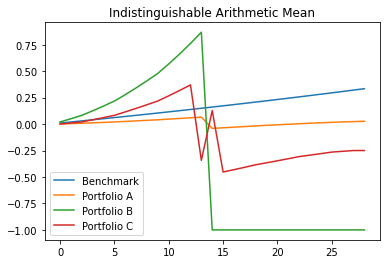

In [4]:
non_additivity_cum_returns = pt.cumulative_returns(non_additivity_returns)

non_additivity_cum_returns.plot(title='Indistinguishable Arithmetic Mean')

<Figure size 720x360 with 0 Axes>

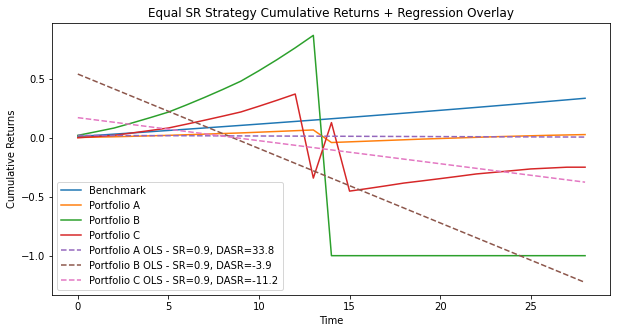

<Figure size 720x360 with 0 Axes>

In [5]:
from sklearn.linear_model import LinearRegression

ols = LinearRegression()

non_additivity_cum_returns.plot(figsize=(10,5))


for i, cum_rets in non_additivity_cum_returns.items():

    if i=='Benchmark':
        continue

    ols.fit(X=np.arange(0,len(cum_rets)).reshape(-1,1), y=cum_rets)
    y_pred = ols.predict(X=np.arange(0,len(cum_rets)).reshape(-1,1))

    plt.plot(y_pred, label=f'{cum_rets.name} OLS - SR={np.round(pt.sharpe_ratio(non_additivity_returns[i]).round(1),1)}, DASR={pt.drift_adjusted_sharpe_ratio(cum_rets).round(1)}', linestyle='--')
    plt.legend()
plt.xlabel("Time")
plt.ylabel("Cumulative Returns")
plt.title('Equal SR Strategy Cumulative Returns + Regression Overlay')
plt.figure(figsize=(10, 5))

In [6]:
non_additivity_sr = pd.Series([pt.sharpe_ratio(ret) for col, ret in non_additivity_returns.items()], index=non_additivity_returns.columns)
non_additivity_dasr = pd.Series([pt.drift_adjusted_sharpe_ratio(ret).round(3) for col, ret in non_additivity_returns.items()], index=non_additivity_returns.columns)
non_additivity_sr, non_additivity_dasr

(Benchmark      8.991870e+16
 Portfolio A    8.992349e-01
 Portfolio B    8.992349e-01
 Portfolio C    8.992349e-01
 dtype: float64,
 Benchmark      13576.170
 Portfolio A       -3.677
 Portfolio B      -25.454
 Portfolio C      -20.326
 dtype: float64)

In [7]:
no_drift_returns = pd.read_excel(r'C:\Users\marcu\Documents\Quant\Programming\Data\dasr_data.xlsx', sheet_name='Drift - No Sense of Order')

<AxesSubplot:title={'center':'Sharpe Ratio Has No Sense of Order'}>

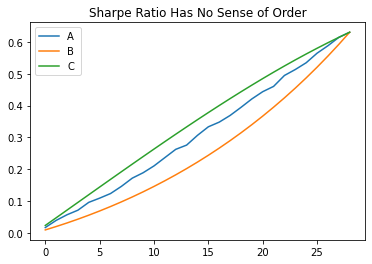

In [8]:
((1+no_drift_returns).cumprod()-1).plot(title='Sharpe Ratio Has No Sense of Order')

In [9]:
no_drift_sr = pd.Series([pt.sharpe_ratio(ret).round(3) for col, ret in no_drift_returns.items()], index=no_drift_returns.columns)
no_drift_dasr = pd.Series([pt.drift_adjusted_sharpe_ratio(ret).round(3) for col, ret in no_drift_returns.items()], index=no_drift_returns.columns)

In [10]:
no_drift_sr, no_drift_dasr

(A     63.388
 B     63.388
 C     63.388
 dtype: float64,
 A     8206.809
 B      652.692
 C     7072.908
 dtype: float64)

In [11]:
sim_strategy_returns = pd.read_excel(r'C:\Users\marcu\Documents\Quant\Programming\Data\dasr_data.xlsx', sheet_name='Sim Strategy Returns').iloc[:, :3].dropna().set_index('Date')
sim_strategy_returns.index = pd.DatetimeIndex(sim_strategy_returns.index)

In [12]:
sim_strategy_returns.columns = ['Noisy Strategy - SR = 1.9', 'Quality Strategy - SR = 1.4']

Text(0, 0.5, 'Cumulative Returns')

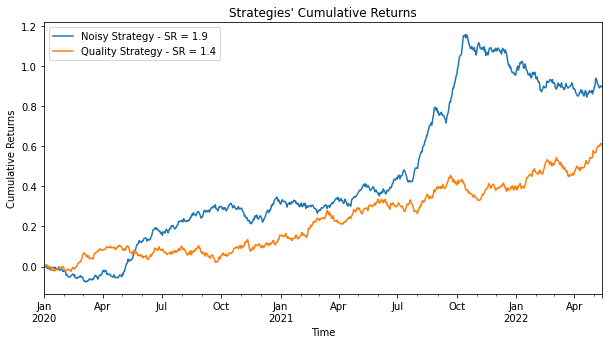

In [13]:
sim_strategy_returns = pt.scale_vol(sim_strategy_returns)
pt.cumulative_returns(sim_strategy_returns).plot(title="Strategies' Cumulative Returns", figsize=(10, 5))
plt.xlabel("Time")
plt.ylabel("Cumulative Returns")

In [14]:
np.random.choice(sim_strategy_returns.iloc[:, 0], size=(len(sim_strategy_returns), 1), replace=False)

array([[ 1.93894158e-03],
       [-2.38424263e-03],
       [ 5.91793806e-03],
       [ 1.29480566e-02],
       [ 6.33485735e-03],
       [-7.65620115e-03],
       [-5.62940623e-03],
       [-1.21847295e-03],
       [ 4.81726189e-03],
       [-4.04500836e-03],
       [ 1.02859185e-02],
       [-5.66928404e-03],
       [ 1.31362485e-02],
       [ 6.44441023e-04],
       [ 4.87394731e-03],
       [ 6.22186861e-03],
       [ 1.09399005e-02],
       [-3.95557854e-04],
       [ 9.54929258e-03],
       [-8.02833375e-04],
       [-1.27874749e-02],
       [-1.01522271e-02],
       [ 9.38722958e-04],
       [ 4.45271354e-04],
       [ 1.52840285e-03],
       [-1.60550567e-02],
       [-7.97695387e-03],
       [-2.02701453e-05],
       [ 3.37507700e-03],
       [-7.40453952e-03],
       [-5.33874695e-03],
       [ 6.11488262e-03],
       [-1.42444590e-03],
       [ 2.10406994e-03],
       [ 4.18259344e-03],
       [-1.84797062e-03],
       [ 1.00491412e-03],
       [ 7.82039956e-03],
       [-1.6

<AxesSubplot:title={'center':'Randomly Permuted Cumulative Returns of Equal Sharpe Ratio'}, xlabel='Time', ylabel='Cumulative Return'>

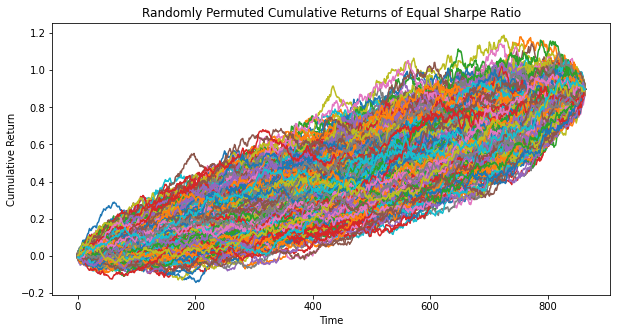

In [15]:
dd = np.empty(shape=(1000, len(sim_strategy_returns)))
for i in np.arange(0, 1000):
    dd[i] = np.random.choice(sim_strategy_returns.iloc[:, 0], size=(len(sim_strategy_returns)), replace=False)

pt.cumulative_returns(pd.DataFrame(dd).T).plot(legend=False, title='Randomly Permuted Cumulative Returns of Equal Sharpe Ratio', 
                                               figsize=(10, 5), 
                                               xlabel='Time',
                                               ylabel='Cumulative Return')

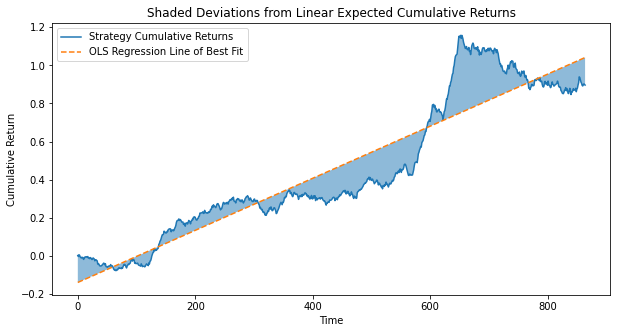

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Generate example data
x = np.arange(0, len(sim_strategy_returns))
y = pt.cumulative_returns(sim_strategy_returns.iloc[:, 0])

# Fit a linear regression model
m, b = np.polyfit(x, y, 1)

# Compute the predicted values of y from the model
y_pred = m * x + b

# Compute the residuals
residuals = y - y_pred

# Compute the diagonal distance between the residuals
diagonal_distance = np.sqrt(residuals ** 2 + x ** 2)

plt.figure(figsize=(10, 5))

# Create a scatter plot of the data points
plt.plot(x, y, label='Strategy Cumulative Returns')

# Plot the line of best fit
plt.plot(x, y_pred, linestyle='--', label='OLS Regression Line of Best Fit')

# Shade the area between the line of best fit and the points
plt.fill_between(x, y, y_pred, alpha=0.5)

# Plot the diagonal distance between the residuals
# plt.plot(x, diagonal_distance, '--')

# Add axis labels and a title
plt.xlabel('Time')
plt.ylabel('Cumulative Return')
plt.title("Shaded Deviations from Linear Expected Cumulative Returns")

# Show the plot
plt.legend()
plt.show()

In [17]:
pt.performance_summary(sim_strategy_returns.iloc[:, 1])

,Performance Summary
Sharpe Ratio,1.424
Drift Adjusted Sharpe Ratio,1.893
CAGR,0.145
Vol,0.100
Sortino Ratio,2.521
Martin (Ulcer) Ratio,4.756
Omega Ratio,1.122
RR Ratio,1.246
Win Rate,0.528
Skew,0.010


In [18]:
pt.performance_summary(sim_strategy_returns.iloc[:, 1]*2)

,Performance Summary
Sharpe Ratio,1.424
Drift Adjusted Sharpe Ratio,1.562
CAGR,0.299
Vol,0.200
Sortino Ratio,2.521
Martin (Ulcer) Ratio,4.737
Omega Ratio,1.183
RR Ratio,1.246
Win Rate,0.528
Skew,0.010


In [19]:
truncated_noisy_returns = pd.read_excel(r'C:\Users\marcu\Documents\Quant\Programming\Data\dasr_data.xlsx', sheet_name='Truncated Sim Strategy Returns').dropna().set_index('Date')
truncated_noisy_returns.index = pd.DatetimeIndex(truncated_noisy_returns.index)
truncated_noisy_sr = pt.sharpe_ratio(truncated_noisy_returns).iloc[0]

Text(0, 0.5, 'Cumulative Returns')

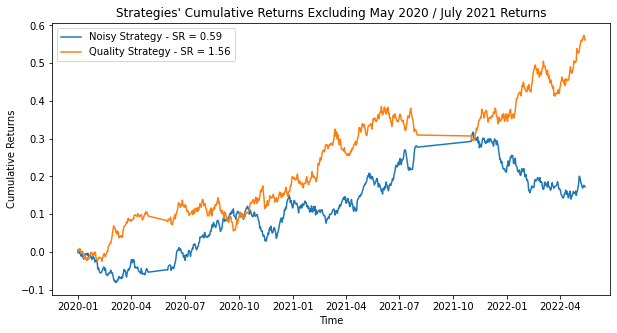

In [20]:
truncated_quality_returns = sim_strategy_returns.loc[sim_strategy_returns.index.intersection(truncated_noisy_returns.index)].iloc[:, 1]
truncated_quality_sr = pt.sharpe_ratio(truncated_quality_returns)

plt.figure(figsize=(10,5))
plt.title("Strategies' Cumulative Returns Excluding May 2020 / July 2021 Returns")
plt.plot(pt.cumulative_returns(pt.scale_vol(truncated_noisy_returns)), label=f'Noisy Strategy - SR = {np.round(truncated_noisy_sr,2)}')
plt.plot(pt.cumulative_returns(pt.scale_vol(truncated_quality_returns)), label=f'Quality Strategy - SR = {np.round(truncated_quality_sr, 2)}')
plt.legend()
plt.xlabel("Time")
plt.ylabel("Cumulative Returns")